#Assignment for Naive Bayes Classifier

To perform text classification of News Headlines and classify news into different topics for a News website.

#Importing the Libraries

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer  #it is used to add weights to the different words of the article
from sklearn.naive_bayes import MultinomialNB  #multinomial naive bayes
from sklearn.pipeline import make_pipeline  #we will take the data from the vectorizer and push it into the multinomial naive bayes
from sklearn.metrics import confusion_matrix  # we will create a confusion matrix to see how well the model works

#Importing the Dataset

In [3]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names #prints the target names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

As we can see, we have 20 News Groups that we have imported. These are categories already assigned to the news groups. We will now be defining the categories.

In [4]:
#defining the categories
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
              'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
              'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

#Training and testing dataset split

We will now see the split of the dataset into two parts, training and testing.

In [5]:
#training the data on these categories
train = fetch_20newsgroups(subset = 'train', categories = categories)
#testing the data on these categories
test = fetch_20newsgroups(subset = 'test', categories = categories)
#printing the training data
print(train.data[5]) #this prints one article from the training dataset. this is done just to show how the data is stored in the database

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

Let us learn more about our dataset. We will see how many entries we have in the data.

In [6]:
print(len(train.data))
print(len(test.data)) #showing how many entries are present in both of the sets.

11314
7532


We will now be making the actual model of Naive Bayes, the libraries and packages for the same are alredy imported in the above codes.

In [8]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB()) #creating a model based on Multinomial Naive Bayes
model.fit(train.data, train.target) #training the data with the training data
labels = model.predict(test.data) #creating labels for the test data

We have created a model and we have tested the data from the test set. We now have to see whether the predictions made by the model are correct or not. for seeing this. We will see how accurate this is by the confusion matrix and the heatmap.

Text(113.92222222222219, 0.5, 'Predicted Label')

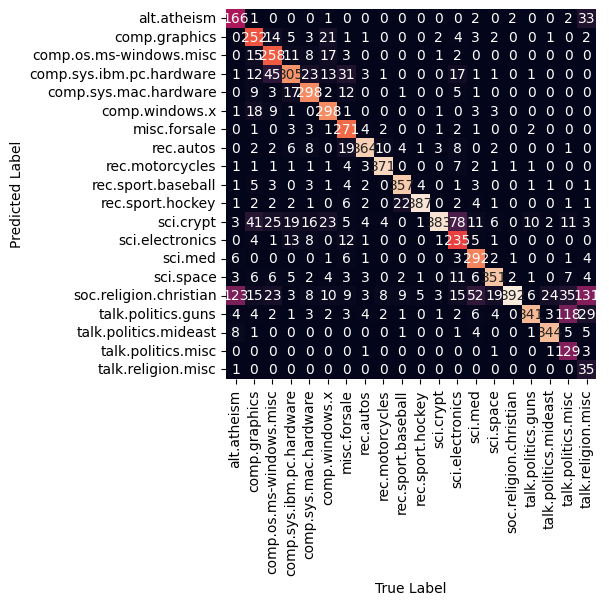

In [11]:
mat = confusion_matrix(test.target, labels)
#plotting the heatmap for the confusion matrix
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

We will now be using the model on a random new data to see how well it works.

In [12]:
#predicting category on new data on trainer model
def predict_category(s, train = train, model = model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

We will now try to enter some values for this string to see how accurate it is.

In [13]:
predict_category('Praise the Lord')

'soc.religion.christian'

We will try it with other strings.

In [14]:
predict_category('Sending load to International Space Station')

'sci.space'

In [15]:
predict_category('Audi is better than a BMW')

'rec.autos'

In [16]:
predict_category('President of USA')

'talk.politics.misc'